# Bout, Stim, and Duration Post Hoc Analysis(CSV for Database) 

In [184]:
import joblib
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
import tkinter as tk
from tkinter import filedialog
from tqdm import tqdm
from tqdm import notebook
import itertools
import math
import seaborn as sns
import statistics 
from collections import OrderedDict
import csv

In [185]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load posthoc-predictions.npy')

%gui tk

infiles

('/Users/Shared/K/KayCei/HDC/AH4-KO/121323-LIGHTS ON/predict_video_exp_16.npy',)

In [186]:
# Check if the user selected any files
if infiles:
    # Assuming infiles is a list of selected file paths, let's use the first one
    selected_file = infiles[0]

    # Extract the directory path from the selected file's full path
    directory_path = os.path.dirname(selected_file)
    
#print(directory_path)

In [187]:
Random_List = [] #creates a array known as random list 
for f in range(len(infiles)):
    arr = np.load(infiles[f])
    Random_List.extend(arr) 
#print(Random_List)

In [188]:
behavior_labels = {
    0.0: "insignificant",
    1.0: "insignificant",
    2.0: "insignificant",
    3.0: "insignificant",
    4.0: "Rear",
    5.0: "insignificant",
    6.0: "insignificant",
    7.0: "Investigate Type 1",
    8.0: "Investigate Type 2", 
    9.0: "Contra-Itch",
    10.0: "Investigate Type 3",
    11.0: "insignificant",
    12.0: "insignificant",
    13.0: "insignificant",
    14.0: "Contra-Body Groom",
    15.0: "Face Groom Type 1",
    16.0: "Dive/Scrunch",
    17.0: "Head Groom",
    18.0: "Ipsi-Orient",
    19.0: "insignificant",
    20.0: "Face Groom Type 2",
    21.0: "Ipsi-Body Groom",
    22.0: "Ipsi-Itch Type 1",
    23.0: "insignificant",
    24.0: "insignificant",
    25.0: "Paw-Groom",
    26.0: "Locomotion",
    27.0: "insignificant",
    28.0: "Contra-Orient",
}

In [189]:
from collections import Counter

# Assuming Random_List contains behavior labels as values
label_counts = Counter(Random_List)

# Print the length of each behavior label
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")


Label: 26, Count: 11968
Label: 8, Count: 10573
Label: 16, Count: 550
Label: 28, Count: 2017
Label: 27, Count: 410
Label: 18, Count: 2340
Label: 15, Count: 1473
Label: 10, Count: 1100
Label: 4, Count: 36
Label: 5, Count: 972
Label: 21, Count: 438
Label: 3, Count: 336
Label: 22, Count: 300
Label: 9, Count: 2376
Label: 23, Count: 377
Label: 7, Count: 1395
Label: 13, Count: 749
Label: 14, Count: 555
Label: 6, Count: 643
Label: 24, Count: 133
Label: 17, Count: 181
Label: 19, Count: 66
Label: 1, Count: 25
Label: 25, Count: 68
Label: 0, Count: 35
Label: 20, Count: 26
Label: 12, Count: 12
Label: 11, Count: 46
Label: 2, Count: 1


# Total Time of Video in deciseconds

In [190]:
duration_in_deciseconds = len(Random_List)
duration_in_minutes = duration_in_deciseconds / 600
duration_in_frames = duration_in_deciseconds * 3

print('This video is', duration_in_deciseconds, 'deciseconds, which is', duration_in_minutes, 'minutes, which is', duration_in_frames, 'frames')
#print(Random_List)

This video is 39201 deciseconds, which is 65.335 minutes, which is 117603 frames


## Creating Array

## Time Integration (deciseconds) 

In [191]:
BehaviorTime = []

for index, value in enumerate(Random_List):
    BehaviorTime.append((value, index))

In [192]:
#print(BehaviorTime)

### Ensures you only analyze expected length of  Session 


length_of_session = (int(input("How long was the session in minutes?"))) * 600
print(length_of_session)
BehaviorTime = BehaviorTime[:(length_of_session+1)]

#### Removes all info after selected end time 

In [193]:
print('This video is ', len(BehaviorTime), ' deciseconds, which is', (len(BehaviorTime)/600), 'minutes' )
print()
#print(BehaviorTime)

This video is  39201  deciseconds, which is 65.335 minutes



## Adds Stim Count and Frame Rate to Array 

In [194]:
for z in BehaviorTime:
    behavior = z[0]
    time= z[1]
behavior_type_and_duration = []
current_behavior = BehaviorTime[0][0]
current_time = BehaviorTime[0][1]  
duration = 0
stim_count=0
frames = 0

for behavior, time in BehaviorTime:
    if behavior == current_behavior:
        start_time= current_time
        duration += 1
            
    else:
        if duration==1:
            end_time=start_time+1
        else:
            end_time= start_time + duration
        frames= duration*6
        stim_count= round(duration/6)
        behavior_type_and_duration.append((current_behavior, duration,frames,stim_count,start_time, end_time))
        current_behavior = behavior
        current_time = time
        start_time= time
        duration = 1
        end_time= time+1
        
# Append the final (current_behavior, current_time, count) tuple outside the loop
behavior_type_and_duration.append((current_behavior, duration, frames, stim_count, start_time, end_time))

# Make a copy of the original behavior_type_and_duration list
behaviortdt= list(behavior_type_and_duration)

In [195]:
#print(behaviortdt)
#print(len(behaviortdt))

# Check Test Behavior Counts CSV

In [196]:
# Initialize a dictionary to store total durations for each behavior label
total_durations = {label: 0 for label in behavior_labels.values()}

# Iterate through the behavior_type_and_duration list
for behavior, duration, _, _, _, _ in behavior_type_and_duration:
    # Get the behavior label based on the behavior code
    behavior_label = behavior_labels.get(behavior, "Unknown")
    
    # Add the duration to the total for the corresponding behavior label
    total_durations[behavior_label] += duration

# Print the total duration for each behavior label
for behavior_label, total_duration in total_durations.items():
    print(f"{behavior_label}: {total_duration}")



insignificant: 3805
Rear: 36
Investigate Type 1: 1395
Investigate Type 2: 10573
Contra-Itch: 2376
Investigate Type 3: 1100
Contra-Body Groom: 555
Face Groom Type 1: 1473
Dive/Scrunch: 550
Head Groom: 181
Ipsi-Orient: 2340
Face Groom Type 2: 26
Ipsi-Body Groom: 438
Ipsi-Itch Type 1: 300
Paw-Groom: 68
Locomotion: 11968
Contra-Orient: 2017


In [197]:
#length_of_session = (int(input("How long was the session in minutes?"))) * 600 
#print(length_of_session) 
behaviortdt = [tup for tup in behaviortdt if tup[5] <= 39001]

In [198]:
print('This video is ', behaviortdt[-1][-1], ' deciseconds, which is', (behaviortdt[-1][-1]/600), 'minutes' )
print()
#print(behaviortdt)

This video is  39001  deciseconds, which is 65.00166666666667 minutes



## Add Bout Count to the Array 

In [199]:
enumerated_behaviortdt = []
behavior_index = {}  # Dictionary to store behavior and its corresponding index

for behavior, duration, frames, stim_count, start_time, end_time in behaviortdt:
    if behavior not in behavior_index:
        behavior_index[behavior] = 1
    else:
        behavior_index[behavior] += 1
    
    bout = behavior_index[behavior]
    enumerated_behaviortdt.append((behavior,stim_count,frames, bout, duration,start_time,end_time))

print(enumerated_behaviortdt)

[(26, 0, 12, 1, 2, 0, 2), (8, 0, 6, 1, 1, 2, 3), (26, 1, 30, 2, 5, 3, 8), (8, 0, 18, 2, 3, 8, 11), (26, 2, 54, 3, 9, 11, 20), (8, 1, 48, 3, 8, 20, 28), (16, 0, 6, 1, 1, 28, 29), (8, 0, 6, 4, 1, 29, 30), (28, 0, 6, 1, 1, 30, 31), (8, 0, 6, 5, 1, 31, 32), (28, 0, 6, 2, 1, 32, 33), (8, 0, 6, 6, 1, 33, 34), (27, 0, 6, 1, 1, 34, 35), (28, 0, 6, 3, 1, 35, 36), (27, 0, 6, 2, 1, 36, 37), (28, 0, 6, 4, 1, 37, 38), (27, 0, 6, 3, 1, 38, 39), (8, 0, 6, 7, 1, 39, 40), (18, 0, 12, 1, 2, 40, 42), (26, 0, 18, 4, 3, 42, 45), (18, 0, 12, 2, 2, 45, 47), (15, 0, 6, 1, 1, 47, 48), (18, 0, 12, 3, 2, 48, 50), (26, 0, 6, 5, 1, 50, 51), (10, 0, 6, 1, 1, 51, 52), (18, 0, 6, 4, 1, 52, 53), (26, 0, 6, 6, 1, 53, 54), (4, 0, 12, 1, 2, 54, 56), (15, 0, 12, 2, 2, 56, 58), (5, 0, 6, 1, 1, 58, 59), (15, 0, 18, 3, 3, 59, 62), (5, 0, 6, 2, 1, 62, 63), (15, 0, 6, 4, 1, 63, 64), (5, 0, 6, 3, 1, 64, 65), (4, 0, 6, 2, 1, 65, 66), (16, 0, 6, 2, 1, 66, 67), (5, 0, 6, 4, 1, 67, 68), (4, 0, 6, 3, 1, 68, 69), (15, 0, 6, 5, 1, 69,

# Stim Count Calcultaion

In [200]:
#BCBDT = []

# Calculate durations and update BCBDT
#for behavior, duration, frames, bout, start_time, end_time in enumerated_behaviortdt:
    #stim_count = round(duration / 3)
    #if stim_count < 1:
        #stim_count = 0
    #if stim_count > 0:
        #BCBDT.append((behavior, duration, frames, bout, stim_count, start_time, end_time))

# Print the modified BCBDT
#print("Modified BCBDT:", BCBDT)

# Assign enumerated_behaviortdt to BCBDST
BCBDST = enumerated_behaviortdt


In [201]:
behavior_labels = {
    0.0: "insignificant",
    1.0: "insignificant",
    2.0: "insignificant",
    3.0: "insignificant",
    4.0: "Rear",
    5.0: "insignificant",
    6.0: "insignificant",
    7.0: "Investigate Type 1",
    8.0: "Investigate Type 2", 
    9.0: "Contra-Itch",
    10.0: "Investigate Type 3",
    11.0: "insignificant",
    12.0: "insignificant",
    13.0: "insignificant",
    14.0: "Contra-Body Groom",
    15.0: "Face Groom Type 1", 
    16.0: "Dive/Scrunch",
    17.0: "Head Groom",
    18.0: "Ipsi-Orient",
    19.0: "insignificant",
    20.0: "Face Groom Type 2",
    21.0: "Ipsi-Body Groom",
    22.0: "Ipsi-Itch Type 1",
    23.0: "insignificant",
    24.0: "insignificant",
    25.0: "Paw-Groom",
    26.0: "Locomotion",
    27.0: "insignificant",
    28.0: "Contra-Orient",
}

bdbt_dict = {}  # Dictionary to store lists of behaviors

for behavior,stim_count,frames, bout, duration,start_time,end_time in BCBDST:
    behavior_label = behavior_labels.get(behavior, "Unknown Behavior")
    if behavior_label not in bdbt_dict:
        bdbt_dict[behavior_label] = []
    bdbt_dict[behavior_label].append((behavior, stim_count, frames, bout, duration, start_time,end_time))


In [202]:


#print(bdbt_dict)

In [203]:
keys_list = bdbt_dict.keys()
print(keys_list)

dict_keys(['Locomotion', 'Investigate Type 2', 'Dive/Scrunch', 'Contra-Orient', 'insignificant', 'Ipsi-Orient', 'Face Groom Type 1', 'Investigate Type 3', 'Rear', 'Ipsi-Body Groom', 'Ipsi-Itch Type 1', 'Contra-Itch', 'Investigate Type 1', 'Contra-Body Groom', 'Head Groom', 'Paw-Groom', 'Face Groom Type 2'])


## Behavior of Interest

In [204]:
for file_path in infiles: # if taking from Z Drive 
    folders = (os.path.dirname(file_path)).split('/')
    print(folders)
    print(len(folders))
    # Check if there are at least 5 elements in the 'folders' list
    if len(folders) >= 5:
        fol3 = folders[3].split('-')  # Split element at position 3 by hyphen
        fol4 = folders[4].split('-')  # Split element at position 4 by hyphen
        
        print("Folder 3:", fol3)
        print("Folder 4:", fol4)
    else:
        print("The folder path does not have enough elements to access positions 3 and 4.")
    

['', 'Users', 'Shared', 'K', 'KayCei', 'HDC', 'AH4-KO', '121323-LIGHTS ON']
8
Folder 3: ['K']
Folder 4: ['KayCei']


In [205]:
for file_path in infiles: # if taking from Z Drive 
    folders = (os.path.dirname(file_path)).split('/')
    print(folders)
    print(len(folders))
    # Check if there are at least 5 elements in the 'folders' list
    if len(folders) >= 5:
        fol3 = folders[6].split('-')  # Split element at position 3 by hyphen
        fol4 = folders[7].split('-')  # Split element at position 4 by hyphen
        
        print("Folder 3:", fol3)
        print("Folder 4:", fol4)
    else:
        print("The folder path does not have enough elements to access positions 3 and 4.")

['', 'Users', 'Shared', 'K', 'KayCei', 'HDC', 'AH4-KO', '121323-LIGHTS ON']
8
Folder 3: ['AH4', 'KO']
Folder 4: ['121323', 'LIGHTS ON']


## Stim Count and Average Duration 

+--------------------+---------------------------+
|        Key         | Average Duration(seconds) |
+--------------------+---------------------------+
|     Locomotion     |    0.28870070166948947    |
| Investigate Type 2 |    0.2998581157775255     |
|    Dive/Scrunch    |    0.12249443207126949    |
|   Contra-Orient    |    0.12979274611398964    |
|   insignificant    |    0.1400604686318972     |
|    Ipsi-Orient     |    0.12702555736813487    |
| Face Groom Type 1  |    0.2959758551307847     |
| Investigate Type 3 |    0.22753623188405797    |
|        Rear        |           0.144           |
|  Ipsi-Body Groom   |    0.17685950413223142    |
|  Ipsi-Itch Type 1  |    0.10277777777777777    |
|    Contra-Itch     |    0.16578026592022393    |
| Investigate Type 1 |    0.2961783439490446     |
| Contra-Body Groom  |    0.14206349206349206    |
|     Head Groom     |    0.1925531914893617     |
|     Paw-Groom      |    0.15454545454545454    |
| Face Groom Type 2  |    0.136

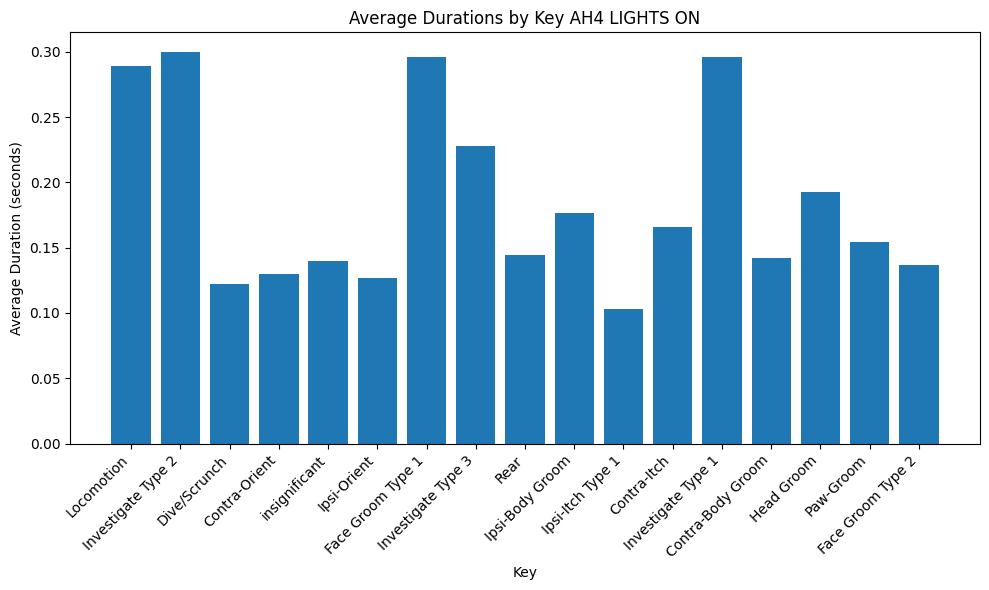

In [206]:
from tabulate import tabulate
import matplotlib.pyplot as plt
import csv


def round_float(value):
    return round(value, 3)

average_duration_by_key = {}

for key, tuples_list in bdbt_dict.items():
    #if key=='insignificant':
        #continue #skip "insignificant" key and its data
    durations = [tuple_item[4] for tuple_item in tuples_list]
    average_duration = (sum(durations) / len(durations))/10
    average_duration_by_key[key] =average_duration

table_data = [(key, avg_duration) for key, avg_duration in average_duration_by_key.items()]
headers = ["Key", "Average Duration(seconds)"]

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

# Create a dictionary for the CSV data
csv_data = {f'{fol3[0]} {fol4[1]} Duration': average_duration_by_key}

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(average_duration_by_key.keys(), average_duration_by_key.values())
plt.xlabel("Key")
plt.ylabel("Average Duration (seconds)")
plt.title(f"Average Durations by Key {fol3[0]} {fol4[1]}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Check if the user selected any files
if infiles:
    # Assuming infiles is a list of selected file paths, let's use the first one
    selected_file = infiles[0]

    # Extract the directory path from the selected file's full path
    directory_path = os.path.dirname(selected_file)

    # Save the plot in the same directory as the selected file with the specified filename
    filename = f'{fol3[0]} {fol4[1]} Duration.png'
    save_path = os.path.join(directory_path, filename)
    plt.savefig(save_path)
    print(f"Plot saved in: {save_path}")

    # Save the CSV data to a CSV file
    csv_filename = f'{fol3[0]} {fol4[1]} Duration.csv'
        # Construct the full path for saving the CSV in the same directory
    csv_save_path = os.path.join(directory_path, csv_filename)

    # Save the CSV data to the CSV file
    with open(csv_save_path, mode="w", newline="") as csv_file:
        csv_writer = csv.writer(csv_file)
        for dictionary_name, data_dict in csv_data.items():
            csv_writer.writerow([dictionary_name])  # Write the dictionary name as a header
            csv_writer.writerow(["Key", "Average Duration (seconds)"])
            for key, avg_duration in data_dict.items():
                csv_writer.writerow([key, avg_duration])

    print(f"CSV data saved in: {csv_save_path}")
    

In [207]:
from tabulate import tabulate
import matplotlib.pyplot as plt

In [208]:
total_count_by_key = {}

for key, tuples_list in bdbt_dict.items():
    #if key=='insignificant':
        #continue #skip "insignificant" key and its data
    durations = [tuple_item[4] for tuple_item in tuples_list]
    behavior= [tuple_item[0] for tuple_item in tuples_list]
    average_count = sum(durations)
    
    total_count_by_key[key] = average_count
    
     # Display the result for each key inside the loop
    print(f"Key: {key}, Average Count: {average_count}")

table_data = [(key, avg_count) for key, avg_count in total_count_by_key.items()]
headers = ["Key", "Average Count"]


table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

Key: Locomotion, Average Count: 11932
Key: Investigate Type 2, Average Count: 10567
Key: Dive/Scrunch, Average Count: 550
Key: Contra-Orient, Average Count: 2004
Key: insignificant, Average Count: 3706
Key: Ipsi-Orient, Average Count: 2336
Key: Face Groom Type 1, Average Count: 1471
Key: Investigate Type 3, Average Count: 1099
Key: Rear, Average Count: 36
Key: Ipsi-Body Groom, Average Count: 428
Key: Ipsi-Itch Type 1, Average Count: 296
Key: Contra-Itch, Average Count: 2369
Key: Investigate Type 1, Average Count: 1395
Key: Contra-Body Groom, Average Count: 537
Key: Head Groom, Average Count: 181
Key: Paw-Groom, Average Count: 68
Key: Face Groom Type 2, Average Count: 26
+--------------------+---------------+
|        Key         | Average Count |
+--------------------+---------------+
|     Locomotion     |     11932     |
| Investigate Type 2 |     10567     |
|    Dive/Scrunch    |      550      |
|   Contra-Orient    |     2004      |
|   insignificant    |     3706      |
|    Ipsi

##  Number of Bouts

+--------------------+-------------+
|        Key         | Total Bouts |
+--------------------+-------------+
|     Locomotion     |    4133     |
| Investigate Type 2 |    3524     |
|    Dive/Scrunch    |     449     |
|   Contra-Orient    |    1544     |
|   insignificant    |    2646     |
|    Ipsi-Orient     |    1839     |
| Face Groom Type 1  |     497     |
| Investigate Type 3 |     483     |
|        Rear        |     25      |
|  Ipsi-Body Groom   |     242     |
|  Ipsi-Itch Type 1  |     288     |
|    Contra-Itch     |    1429     |
| Investigate Type 1 |     471     |
| Contra-Body Groom  |     378     |
|     Head Groom     |     94      |
|     Paw-Groom      |     44      |
| Face Groom Type 2  |     19      |
+--------------------+-------------+
CSV data saved in: /Users/Shared/K/KayCei/HDC/AH4-KO/121323-LIGHTS ON/AH4 LIGHTS ON Bouts.csv


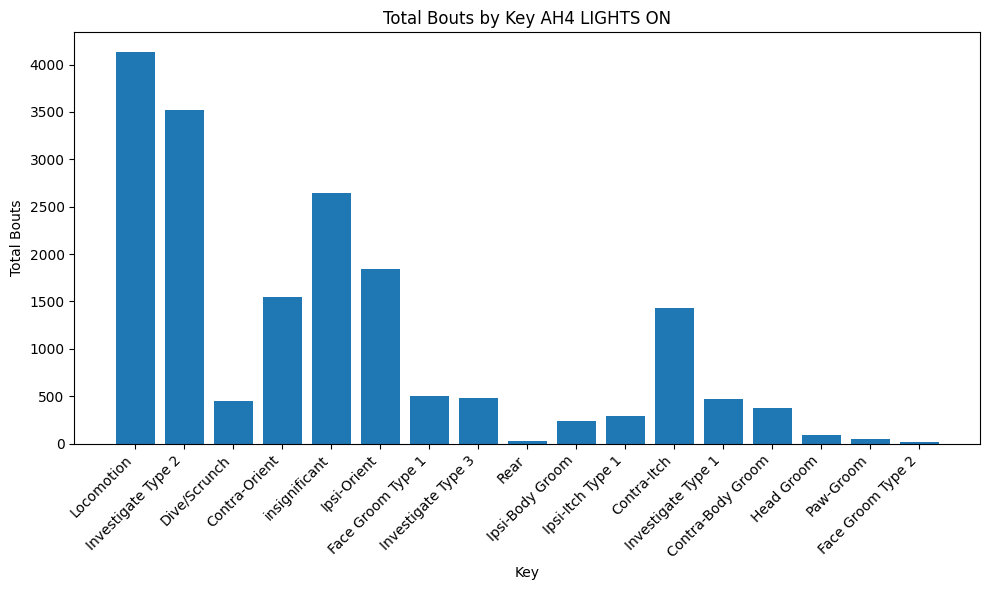

In [209]:
bout_by_key = {}

for key, tuples_list in bdbt_dict.items():
    #if key=='insignificant':
        #continue #skip "insignificant" key and its data
    bouts = [tuple_item[3] for tuple_item in tuples_list]
    sum_of_bouts = len(bouts)
    bout_by_key[key] = sum_of_bouts

table_data = [(key, sum_value) for key, sum_value in bout_by_key.items()]
headers = ["Key", "Total Bouts"]

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

# Create a dictionary for the CSV data
csv_data_bouts = {f'{fol3[0]} {fol4[1]}': bout_by_key}
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(bout_by_key.keys(), bout_by_key.values())
plt.xlabel("Key")
plt.ylabel("Total Bouts")
plt.title(f'Total Bouts by Key {fol3[0]} {fol4[1]}')
plt.xticks(rotation=45, ha='right')  # Set the x-axis ticks and labels
plt.tight_layout()
# Check if the user selected any files
if infiles:
    # Assuming infiles is a list of selected file paths, let's use the first one
    selected_file = infiles[0]

    # Extract the directory path from the selected file's full path
    directory_path = os.path.dirname(selected_file)
    # Save the plot as "(specific animals) Bout.png"
    filename_bout= f'{fol3[0]} {fol4[1]} Bouts.png'
    save_path= os.path.join(directory_path,filename_bout)
    plt.savefig(save_path)

    # Save the CSV data to a CSV file
    csv_filename_bouts = f'{fol3[0]} {fol4[1]} Bouts.csv'
    csv_save_path = os.path.join(directory_path, csv_filename_bouts)
    
    with open(csv_save_path, mode="w", newline="") as csv_file:
        csv_writer = csv.writer(csv_file)
        for dictionary_name, data_dict in csv_data_bouts.items():
            csv_writer.writerow([dictionary_name])  # Write the dictionary name as a header
            csv_writer.writerow(["Key", "Total Bouts"])
            for key, sum_value in data_dict.items():
                csv_writer.writerow([key, sum_value])
    print(f"CSV data saved in: {csv_save_path}")

# Check!!!

In [210]:
print(csv_save_path)

/Users/Shared/K/KayCei/HDC/AH4-KO/121323-LIGHTS ON/AH4 LIGHTS ON Bouts.csv


In [211]:
for file_path in infiles:  # if taking from Z Drive 
    folders = os.path.dirname(file_path).rsplit('\\', 1)
    print(folders)

['/Users/Shared/K/KayCei/HDC/AH4-KO/121323-LIGHTS ON']


In [212]:
import pandas as pd

# Define the file paths for the two CSV files and the output CSV file
bout_csv_filename = os.path.join('/'.join(folders), csv_filename_bouts)
duration_csv_filename = os.path.join('/'.join(folders), csv_filename )

# Read the CSV files into DataFrames
bout_df = pd.read_csv(bout_csv_filename, skiprows=[0])
duration_df = pd.read_csv(duration_csv_filename, skiprows=[0])

print("Columns in bout_df:", bout_df.columns)
print("Columns in duration_df:", duration_df.columns)

Columns in bout_df: Index(['Key', 'Total Bouts'], dtype='object')
Columns in duration_df: Index(['Key', 'Average Duration (seconds)'], dtype='object')


In [213]:
# Merge the two DataFrames on the shared key column (e.g., "Key")
merged_df = bout_df.merge(duration_df, on="Key", how="inner")

# Perform the multiplication: Total Bouts * Average Duration (seconds)
merged_df["Result(seconds)"] = merged_df["Total Bouts"] * merged_df["Average Duration (seconds)"]

# Display the results DataFrame within the Jupyter Notebook
display(merged_df)


Key  Total Bouts  Average Duration (seconds)  \
0           Locomotion         4133                    0.288701   
1   Investigate Type 2         3524                    0.299858   
2         Dive/Scrunch          449                    0.122494   
3        Contra-Orient         1544                    0.129793   
4        insignificant         2646                    0.140060   
5          Ipsi-Orient         1839                    0.127026   
6    Face Groom Type 1          497                    0.295976   
7   Investigate Type 3          483                    0.227536   
8                 Rear           25                    0.144000   
9      Ipsi-Body Groom          242                    0.176860   
10    Ipsi-Itch Type 1          288                    0.102778   
11         Contra-Itch         1429                    0.165780   
12  Investigate Type 1          471                    0.296178   
13   Contra-Body Groom          378                    0.142063   
14          Head Groom           94                    0.192553   
15           Paw-Groom           44                    0.154545   
16   Face Groom Type 2           19                    0.136842   

    Result(seconds)  
0            1193.2  
1            1056.7  
2              55.0  
3             200.4  
4             370.6  
5             233.6  
6             147.1  
7             109.9  
8               3.6  
9              42.8  
10             29.6  
11            236.9  
12            139.5  
13             53.7  
14             18.1  
15              6.8  
16              2.6

In [214]:
# Calculate the sum of the "Result" column in the DataFrame
total_result = (merged_df["Result(seconds)"].sum())/60

print(f"Sum of the 'Result' column: {total_result} minutes")


Sum of the 'Result' column: 65.00166666666665 minutes


## Creating CSV

In [215]:
rounded_dict = {}

for key, value_list in bdbt_dict.items():
    rounded_values = [
        (
            round(v[0]),     # Rounding and converting to integer
            v[1], v[2], v[3], 
            round(v[4], 3),
            round(v[5], 2),  
            round(v[6], 2)   
        )
        for v in value_list
    ]
    rounded_dict[key] = rounded_values

#print(rounded_dict)

bdbt_dict=rounded_dict
#print(bdbt_dict)

In [216]:
from json import dumps
string_bdbt_dict=dumps(bdbt_dict)

In [217]:
# Find the start index of the first '{' character
start_index = string_bdbt_dict.index('{')

# Find the end index of the last '}' character
end_index = string_bdbt_dict.rindex('}') + 1

# Extract the dictionary portion of the string
dict_str = string_bdbt_dict[start_index:end_index]

# Find the start indices of key-value pairs using '":'
key_value_end = []
for pos, char in enumerate(dict_str):
    if dict_str[pos:pos+3] == '": ':
        key_value_end.append(pos)
        
#print(key_value_end)      

# Initialize lists to store extracted keys and values
keys = []
values = []
value_ends=[]

# Iterate through the start indices of key-value pairs
for key_value_start in key_value_end:
    # Find the start index of the value by searching for '[[' after the key-value pair
    value_start = dict_str.find('[[', key_value_start) + 1
    
    # Find the end index of the value by searching for ']]' after the value_start
    value_end = dict_str.find(']]', value_start)+ 2
    value_ends.append(value_end)

    # Extract the value using the calculated start and end indices
    value = dict_str[value_start:value_end]
    values.append(value)
    # Extract the key using the portion of the string before the '":'
    if key_value_start == key_value_end[0]:
        key = dict_str[2:key_value_start].strip()
        keys.append(key)
    else:
        key = dict_str[value_ends[-2]+ 3:key_value_start].strip()
        keys.append(key)
        
#print(values)
#print(value_ends)
modified_values = {}  # Initialize an empty dictionary to store modified values

# Iterate through the keys and values
for key, value in zip(keys, values):
    modified_value = value.replace(" ", "").replace("],", "]").replace("]]","]")
    modified_values[key] = modified_value

In [218]:
keys_to_write = ["Rear", "Investigate Type 1", "Investigate Type 2",
                 "Contra-Itch", "Investigate Type 3", "Contra-Body Groom",
                 "Face Groom Type 1", "Dive/Scrunch", "Head Groom", "Ipsi-Orient",
                 "Face Groom Type 2", "Ipsi-Body Groom", "Ipsi-Itch Type 1",
                 "Paw-Groom", "Locomotion", "Contra-Orient"]

In [219]:
# Create a dictionary to hold cleaned and possibly split values
cleaned_values = {}

In [220]:
# Iterate through the keys and values, cleaning and splitting if needed
for key in keys_to_write:
    value = modified_values[key].strip()
    
    if len(value) > 32500:
        # Find the last "]" before 32500 characters
        split_index = value.rfind("]", 0, 32500)
        
        if split_index != -1:
            # Split the value into two parts
            part1 = value[:split_index + 1]  # Include the last "]"
            part2 = value[split_index + 1:]
            
            cleaned_values[key] = part1  # Store the first part
            
            continue_key = f"{key} Continue"
            continue_count = 1
            
            while len(part2) > 32500:
                continue_count += 1
                split_index = part2.rfind("]", 0, 32500)  # Find the last "]" in the remaining portion
                part1 = part2[:split_index + 1]
                part2 = part2[split_index + 1:]
                cleaned_values[f"{key} Continue {continue_count}"] = part1
            cleaned_values[f"{key} Continue {continue_count + 1}"] = part2  # Store the remaining part
            
        else:
            # If "]" is not found, just store the value as it is
            cleaned_values[key] = value
    else:
        cleaned_values[key] = value


In [221]:
# Format specific values in cleaned_values dictionary
formatted_values = {'"{}"'.format(key): value for key, value in cleaned_values.items()}

In [222]:
# Initialize the list of behavior keys you want to include in mouse_data
behavior_keys = list(cleaned_values.keys())

In [223]:
print(behavior_keys)

['Rear', 'Investigate Type 1', 'Investigate Type 2', 'Investigate Type 2 Continue 2', 'Investigate Type 2 Continue 3', 'Contra-Itch', 'Contra-Itch Continue 2', 'Investigate Type 3', 'Contra-Body Groom', 'Face Groom Type 1', 'Dive/Scrunch', 'Head Groom', 'Ipsi-Orient', 'Ipsi-Orient Continue 2', 'Face Groom Type 2', 'Ipsi-Body Groom', 'Ipsi-Itch Type 1', 'Paw-Groom', 'Locomotion', 'Locomotion Continue 2', 'Locomotion Continue 3', 'Locomotion Continue 4', 'Contra-Orient', 'Contra-Orient Continue 2']


In [224]:
# Specify the output path for the CSV file
#output_path = r"Z:\KayCei\Practice 16.csv" #if on Yttri-Lab
output_path="/Users/Shared/K/KayCei/Practice 16.csv"

data_dict = {}
session_numbers = {}

# Iterate through each file in infiles
for file_path in infiles: # if taking from Z Drive 
    folders = (os.path.dirname(file_path)).split('/')
    print(folders)
    # Extract the mouse name from the file path
    mouse_name = fol3[0]
    # Extract the genotype from the file path
    genotype = fol3[1]
    # Extract the date from the file path
    date = fol4[0]
    environment= fol4[1]
#for file_path in infiles:   #if taking files from D drive
    #folders = (os.path.dirname(file_path)).split('/')
    #print(folders)
    # Extract the mouse name from the file path
    #mouse_name = folders[6].split('-')[0]
    # Extract the genotype from the file path
    #genotype = folders[6].split('-')[1]
    # Extract the date from the file path
    #date = folders[-1].split('-')[0]    
# Determine the session number for this mouse and stim behavior
    key = (mouse_name, environment)
    if key not in session_numbers:
        session_numbers[key] = 1
    else:
        session_numbers[key] += 1
    session_number = session_numbers[key]

   # Initialize the mouse_data dictionary
    mouse_data = {
        "Mouse": mouse_name,
        "Genotype": genotype,
        "Date": date,
        "Environment": environment,
        "Session Number": session_number,
    }

    for behavior_key in behavior_keys:
        cleaned_value = cleaned_values.get(behavior_key, 0)
        mouse_data[behavior_key] = cleaned_value

        if not behavior_key.endswith("Continue"):
            bout_count = bout_by_key.get(behavior_key, 0)
            average_duration = average_duration_by_key.get(behavior_key, 0)

            mouse_data[f"{behavior_key} Total Bout Count"] = bout_count
            mouse_data[f"{behavior_key} Average Duration(s)"] = average_duration

            # Check if the behavior_key ends with "Continue"
            if behavior_key.endswith("Continue"):
                # Remove the "Total bout" and "Average duration" columns
                del mouse_data[f"{behavior_key} Total Bout Count"]
                del mouse_data[f"{behavior_key} Average Duration(s)"]

    # Add mouse_data to data_dict
    data_dict[mouse_name] = mouse_data

['', 'Users', 'Shared', 'K', 'KayCei', 'HDC', 'AH4-KO', '121323-LIGHTS ON']


In [225]:
import re

# Define a pattern to match "Continue" followed by one or more digits
pattern = r"Continue \d+ (Total Bout Count|Average Duration\(s\))"

# Create a list of keys to remove based on the pattern
keys_to_remove = [key for key in mouse_data.keys() if re.search(pattern, key)]

# Remove the keys and their associated values from the dictionary
for key in keys_to_remove:
    del mouse_data[key]

# Print the updated dictionary
#print(mouse_data)

In [226]:
#print(keys_to_remove)

In [227]:
# Using a list comprehension
#keys = [key for key in mouse_data.keys()]
#print(keys)

In [228]:
# Define the headers for the CSV file
headers = list(mouse_data.keys())

In [229]:
print(headers)

['Mouse', 'Genotype', 'Date', 'Environment', 'Session Number', 'Rear', 'Rear Total Bout Count', 'Rear Average Duration(s)', 'Investigate Type 1', 'Investigate Type 1 Total Bout Count', 'Investigate Type 1 Average Duration(s)', 'Investigate Type 2', 'Investigate Type 2 Total Bout Count', 'Investigate Type 2 Average Duration(s)', 'Investigate Type 2 Continue 2', 'Investigate Type 2 Continue 3', 'Contra-Itch', 'Contra-Itch Total Bout Count', 'Contra-Itch Average Duration(s)', 'Contra-Itch Continue 2', 'Investigate Type 3', 'Investigate Type 3 Total Bout Count', 'Investigate Type 3 Average Duration(s)', 'Contra-Body Groom', 'Contra-Body Groom Total Bout Count', 'Contra-Body Groom Average Duration(s)', 'Face Groom Type 1', 'Face Groom Type 1 Total Bout Count', 'Face Groom Type 1 Average Duration(s)', 'Dive/Scrunch', 'Dive/Scrunch Total Bout Count', 'Dive/Scrunch Average Duration(s)', 'Head Groom', 'Head Groom Total Bout Count', 'Head Groom Average Duration(s)', 'Ipsi-Orient', 'Ipsi-Orient T

In [230]:
if os.path.exists(output_path):
    # Keep track of existing entries in the CSV to avoid duplicates
    existing_entries = set()
    entry_key2_session_numbers = {}
    sorted_entries = []

    # Read existing data from the CSV and add it to the set
    with open(output_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile, delimiter=';')
        for row in reader:
            entry_key = (row["Mouse"], row["Date"], row["Environment"])
            entry_key2 = (row["Mouse"], row["Date"], row["Environment"], row["Genotype"])
            existing_entries.add(entry_key)
            entry_key2_session_numbers[entry_key2] = int(row["Session Number"])
            sorted_entries.append(row)
        
else:
    existing_entries = set()
    entry_key2_session_numbers = {}
    
# Ensure the output directory exists before writing the CSV file
output_dir = os.path.dirname(output_path)
os.makedirs(output_dir, exist_ok=True)

# Write the data from data_dict to the CSV file (in append mode 'a')
with open(output_path, 'a', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=headers, delimiter=';')

    # Check if the file is empty, if so, write the header
    if csvfile.tell() == 0:
        writer.writeheader()

for mouse_data in data_dict.values():
    entry_key = (mouse_data["Mouse"], mouse_data["Date"], mouse_data["Environment"])
    entry_key2 = (mouse_data["Mouse"], mouse_data["Date"], mouse_data["Environment"])

    # Check if the entry already exists in the CSV
    if entry_key not in existing_entries:
        session_number = entry_key2_session_numbers.get(entry_key2, 0) + 1
        existing_entries.add(entry_key)
        entry_key2_session_numbers[entry_key2] = session_number

        for formatted_key in behavior_keys:
            if formatted_key in formatted_values:
                mouse_data[formatted_key] = formatted_values[formatted_key]

        # Write the complete mouse data to the CSV
        sorted_entries.append(mouse_data)  # Add the new entry

        print("Entry added Successfully:", entry_key)
    else:
        print("Entry already exists in the CSV:", entry_key)

Entry added Successfully: ('AH4', '121323', 'LIGHTS ON')


In [231]:
# Add unique keys from unique_entry_keys to fieldnames
fieldnames=headers

In [232]:
# Convert the fieldnames list to a set
fieldnames_set = set(headers)  # Replace 'headers' with your actual fieldnames list

# Extract the keys from the dictionaries within sorted_entries and create a set
entry_keys_set = set()
for entry in sorted_entries:
    entry_keys_set.update(entry.keys())

# Find the unique keys in fieldnames_set and entry_keys_set
unique_fieldnames = fieldnames_set.difference(entry_keys_set)
unique_entry_keys = entry_keys_set.difference(fieldnames_set)

# Print the unique keys
print("Unique keys in fieldnames_set:", unique_fieldnames)
print("Unique keys in entry_keys_set:", unique_entry_keys)


Unique keys in fieldnames_set: set()
Unique keys in entry_keys_set: {'Investigate Type 2 Continue 4'}


In [233]:
for unique_entry_key in unique_entry_keys:
    # Check if unique_entry_key exists (not None and not an empty string)
    if unique_entry_key:
        # Extract the prefix by splitting at the first space followed by a digit
        prefix_to_match = re.split(r'\s+\d', unique_entry_key)[0]

        # Find the position to insert unique_entry_key
        insert_position = None

        for i in range(len(fieldnames) - 1, -1, -1):
            if fieldnames[i].startswith(prefix_to_match):
                insert_position = i + 1
                break

        # If the prefix is not found, append the key to the end
        if insert_position is None:
            insert_position = len(fieldnames)

        # Insert the unique_entry_key at the specified position
        fieldnames.insert(insert_position, unique_entry_key)
    else:
        # Skip to the next iteration (next unique_entry_key)
        continue

In [234]:
print(fieldnames)

['Mouse', 'Genotype', 'Date', 'Environment', 'Session Number', 'Rear', 'Rear Total Bout Count', 'Rear Average Duration(s)', 'Investigate Type 1', 'Investigate Type 1 Total Bout Count', 'Investigate Type 1 Average Duration(s)', 'Investigate Type 2', 'Investigate Type 2 Total Bout Count', 'Investigate Type 2 Average Duration(s)', 'Investigate Type 2 Continue 2', 'Investigate Type 2 Continue 3', 'Contra-Itch', 'Contra-Itch Total Bout Count', 'Contra-Itch Average Duration(s)', 'Contra-Itch Continue 2', 'Investigate Type 3', 'Investigate Type 3 Total Bout Count', 'Investigate Type 3 Average Duration(s)', 'Investigate Type 2 Continue 4', 'Contra-Body Groom', 'Contra-Body Groom Total Bout Count', 'Contra-Body Groom Average Duration(s)', 'Face Groom Type 1', 'Face Groom Type 1 Total Bout Count', 'Face Groom Type 1 Average Duration(s)', 'Dive/Scrunch', 'Dive/Scrunch Total Bout Count', 'Dive/Scrunch Average Duration(s)', 'Head Groom', 'Head Groom Total Bout Count', 'Head Groom Average Duration(s

In [235]:
# Sort the entries based on date within each group of entries that share the same entry_key2
sorted_entries.sort(key=lambda x: (x["Mouse"], x["Date"], x["Environment"]))

# Update the session numbers based on the sorted order
entry_key2_counter = {}  # To track the session numbers within each entry_key2 group

for entry in sorted_entries:
    entry_key2 = (entry["Mouse"], entry["Date"], entry["Environment"], entry["Genotype"])
    
    if entry_key2 not in entry_key2_counter:
        entry_key2_counter[entry_key2] = 1
    else:
        entry_key2_counter[entry_key2] += 1
    
    entry["Session Number"] = entry_key2_counter[entry_key2]

# Sort the entries based on date within each group of entries that share the same entry_key2
sorted_entries.sort(key=lambda x: (x["Mouse"], x["Date"], x["Environment"], x["Genotype"]))

# Rewrite the CSV file with sorted and formatted entries, including any missing fields
with open(output_path, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, delimiter=';')
    writer.writeheader()
    writer.writerows(sorted_entries)
